In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")



In [13]:
print("911 Call Analysis Project")
print("=" * 50)

# 1. DATA LOADING AND INITIAL EXPLORATION
print("\n1. LOADING DATA")
print("-" * 30)

# Load the dataset
try:
    df = pd.read_csv('911.csv')
    print(f"Dataset loaded successfully!")
    print(f"Shape: {df.shape}")
except FileNotFoundError:
    print("Error: 911.csv file not found. Please ensure the file is in the same directory.")
    print("You can download it from: https://www.kaggle.com/mchirico/montcoalert")
    exit()
    # Basic information about the dataset
print(f"\nDataset Info:")
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")
print(f"\nColumn Names:")
print(df.columns.tolist())
# Display first few rows
print(f"\nFirst 5 rows:")
print(df.head())
# Check data types
print(f"\nData Types:")
print(df.dtypes)
# Check for missing values
print(f"\nMissing Values:")
print(df.isnull().sum())
# Basic statistics
print(f"\nBasic Statistics:")
print(df.describe())

911 Call Analysis Project

1. LOADING DATA
------------------------------
Dataset loaded successfully!
Shape: (663522, 9)

Dataset Info:
Rows: 663522
Columns: 9

Column Names:
['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e']

First 5 rows:
         lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/

In [18]:
# 2. DATA CLEANING
print("\n\n2. DATA CLEANING")
print("-" * 30)

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows")

# Handle missing values
print(f"\nHandling missing values:")
initial_shape = df.shape[0]

# Remove rows with missing critical information
df = df.dropna(subset=['lat', 'lng', 'title', 'timeStamp'])
print(f"Removed {initial_shape - df.shape[0]} rows with missing critical data")

# Convert timestamp to datetime
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
print("Converted timeStamp to datetime format")

# Extract additional time features
df['hour'] = df['timeStamp'].dt.hour
df['day_of_week'] = df['timeStamp'].dt.day_name()
df['month'] = df['timeStamp'].dt.month
df['year'] = df['timeStamp'].dt.year
df['date'] = df['timeStamp'].dt.date

print("Extracted time features: hour, day_of_week, month, year, date")

# Clean and categorize the title column
df['reason'] = df['title'].apply(lambda x: x.split(':')[0])
print("Extracted reason from title column")

# Check the cleaned data
print(f"\nCleaned dataset shape: {df.shape}")
print(f"Date range: {df['timeStamp'].min()} to {df['timeStamp'].max()}")




2. DATA CLEANING
------------------------------
Number of duplicate rows: 0

Handling missing values:
Removed 0 rows with missing critical data
Converted timeStamp to datetime format
Extracted time features: hour, day_of_week, month, year, date
Extracted reason from title column

Cleaned dataset shape: (663282, 15)
Date range: 2015-12-10 14:39:21 to 2020-07-29 15:54:08


In [19]:
print("\n\n3. DATA EXPLORATION")
print("-" * 30)

# Top reasons for 911 calls
print("Top 10 reasons for 911 calls:")
reason_counts = df['reason'].value_counts().head(10)
print(reason_counts)

# Calls by hour
print(f"\nCalls by hour:")
hourly_calls = df['hour'].value_counts().sort_index()
print(hourly_calls)

# Calls by day of week
print(f"\nCalls by day of week:")
daily_calls = df['day_of_week'].value_counts()
print(daily_calls)

# Calls by month
print(f"\nCalls by month:")
monthly_calls = df['month'].value_counts().sort_index()
print(monthly_calls)

# Top townships
print(f"\nTop 10 townships with most calls:")
township_calls = df['twp'].value_counts().head(10)
print(township_calls)




3. DATA EXPLORATION
------------------------------
Top 10 reasons for 911 calls:
reason
EMS        332591
Traffic    230115
Fire       100576
Name: count, dtype: int64

Calls by hour:
hour
0     13860
1     11746
2     10653
3      9485
4      9265
5     11674
6     17217
7     26963
8     33364
9     35470
10    36561
11    38057
12    40086
13    39784
14    40328
15    42248
16    42787
17    44087
18    37304
19    32438
20    28062
21    24649
22    20304
23    16890
Name: count, dtype: int64

Calls by day of week:
day_of_week
Friday       102902
Wednesday     99126
Thursday      98637
Tuesday       97651
Monday        96722
Saturday      89414
Sunday        78830
Name: count, dtype: int64

Calls by month:
month
1     62312
2     55423
3     60015
4     53560
5     57488
6     60020
7     59823
8     48355
9     47194
10    51239
11    50176
12    57677
Name: count, dtype: int64

Top 10 townships with most calls:
twp
LOWER MERION        55470
ABINGTON            39927
NORRISTOWN



4. DATA VISUALIZATION
------------------------------


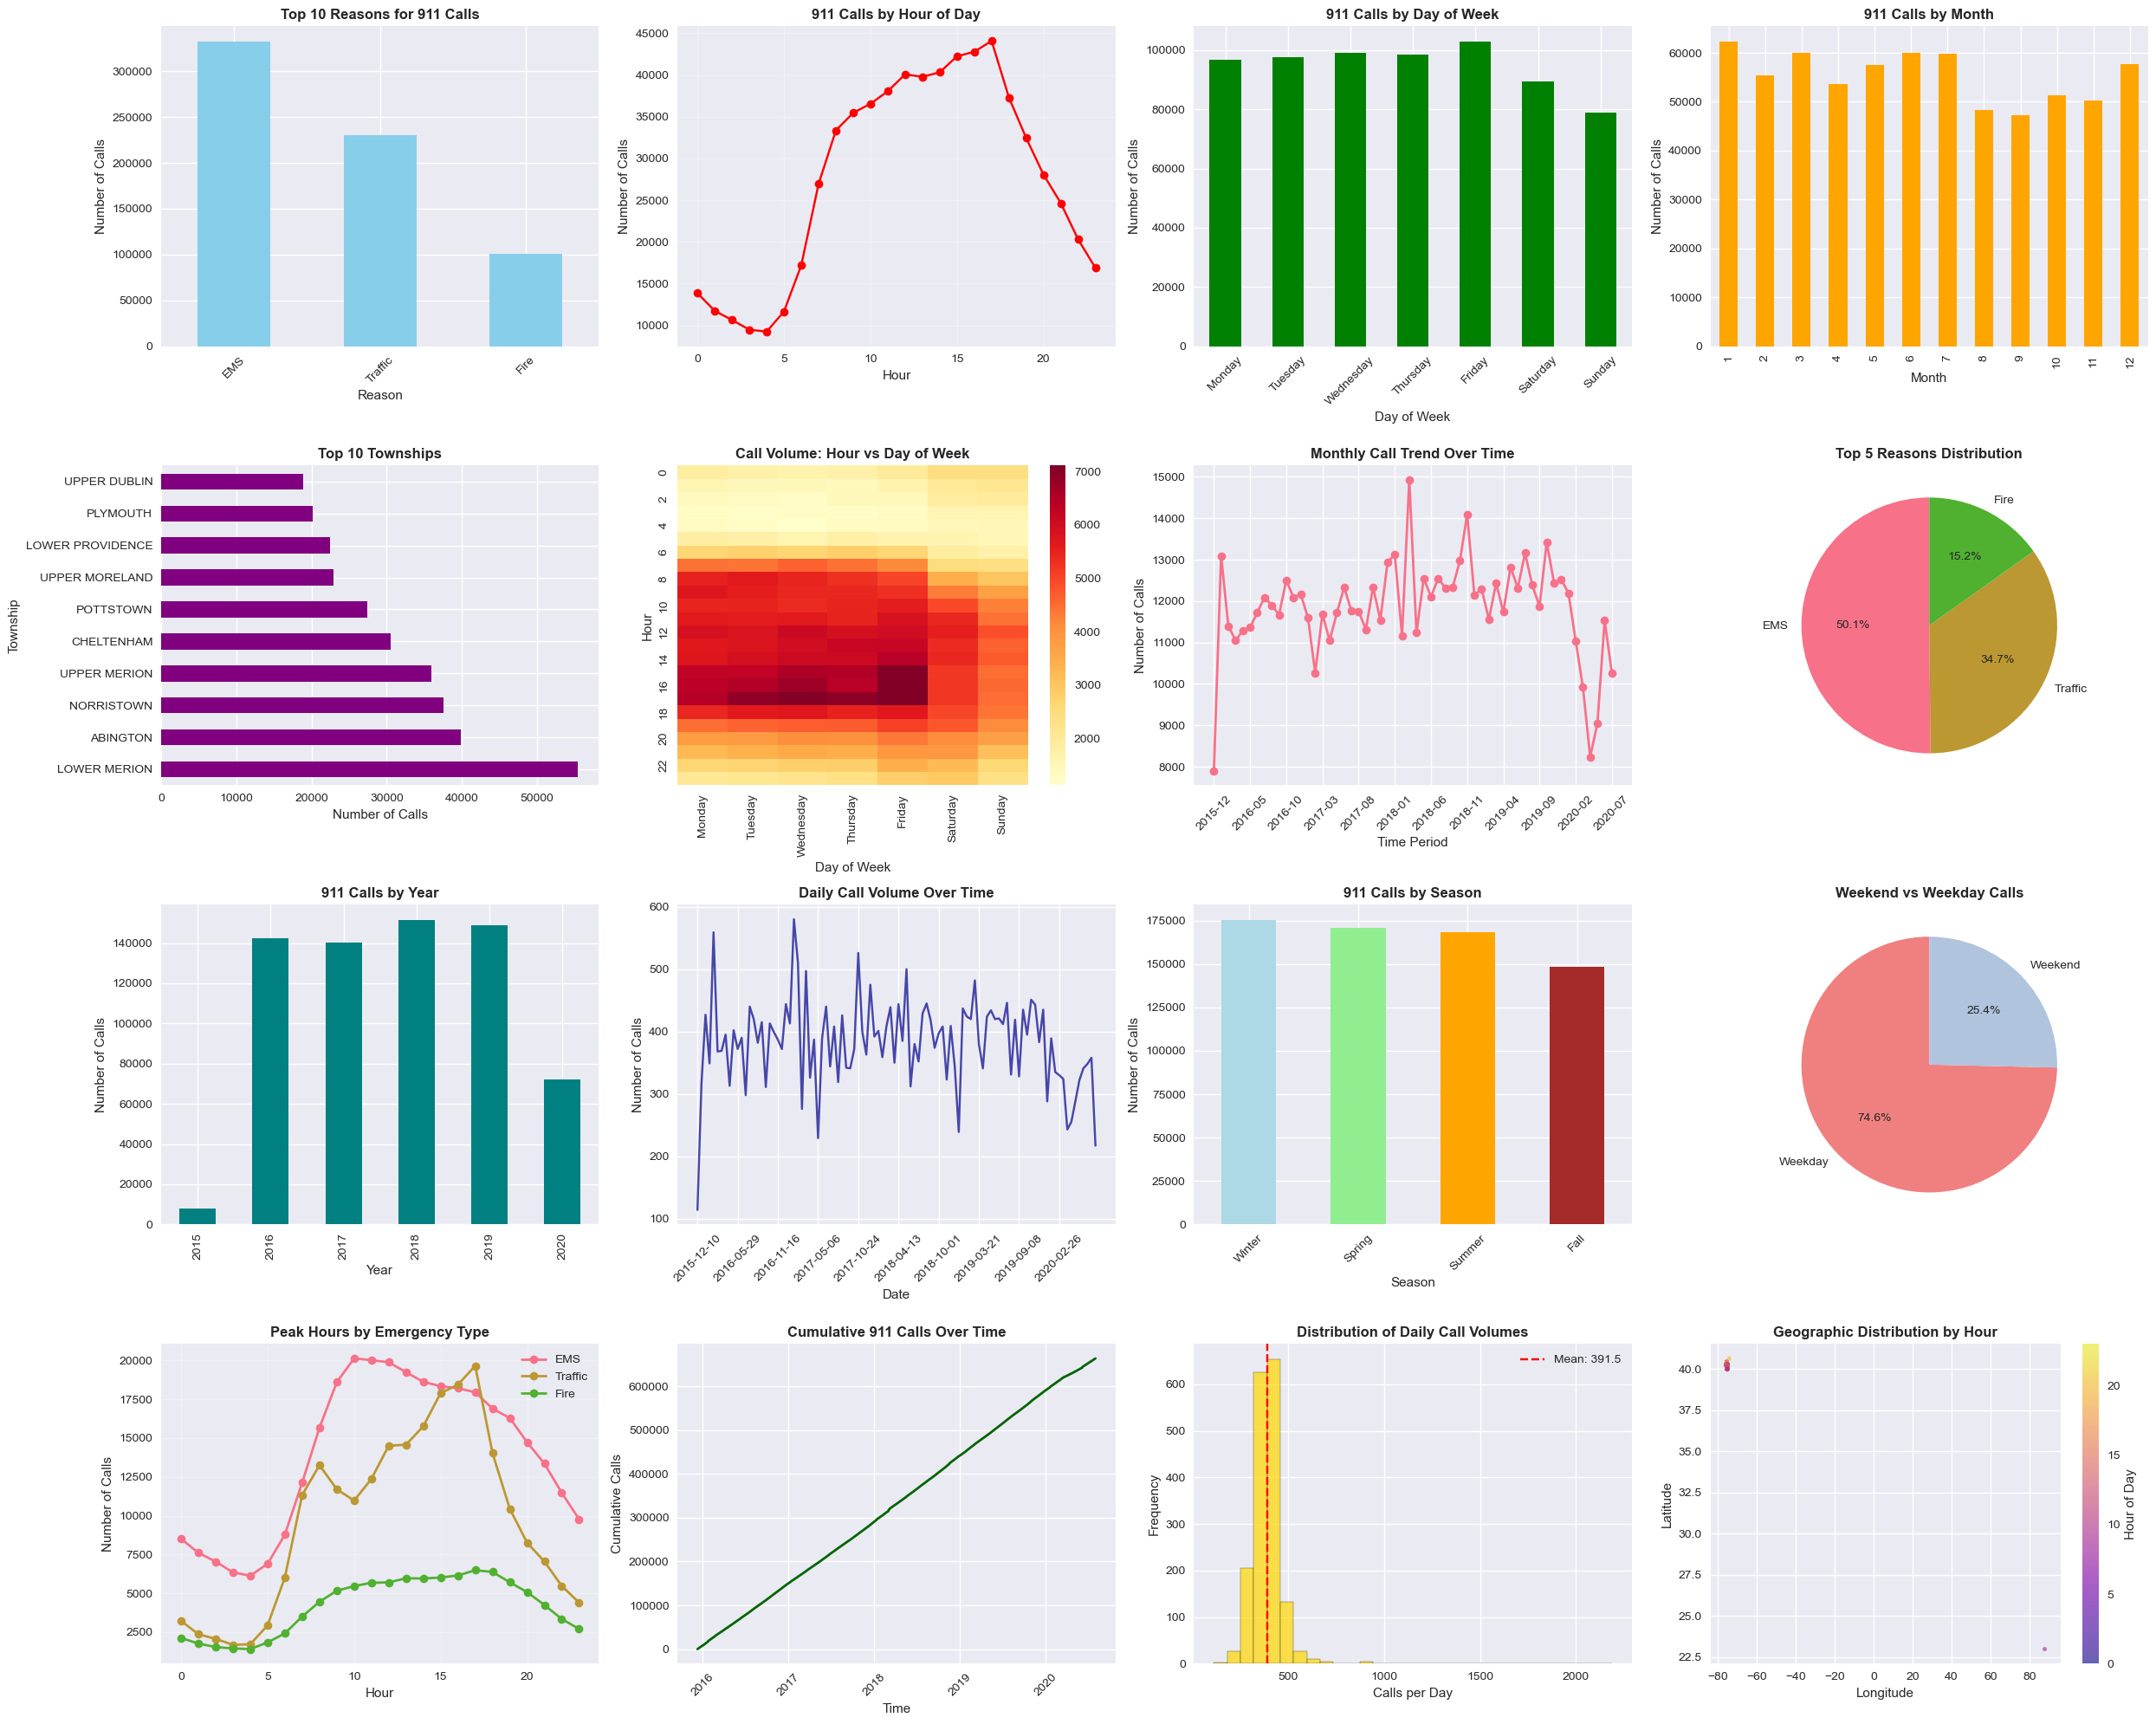


4.1 ADVANCED VISUALIZATIONS
------------------------------


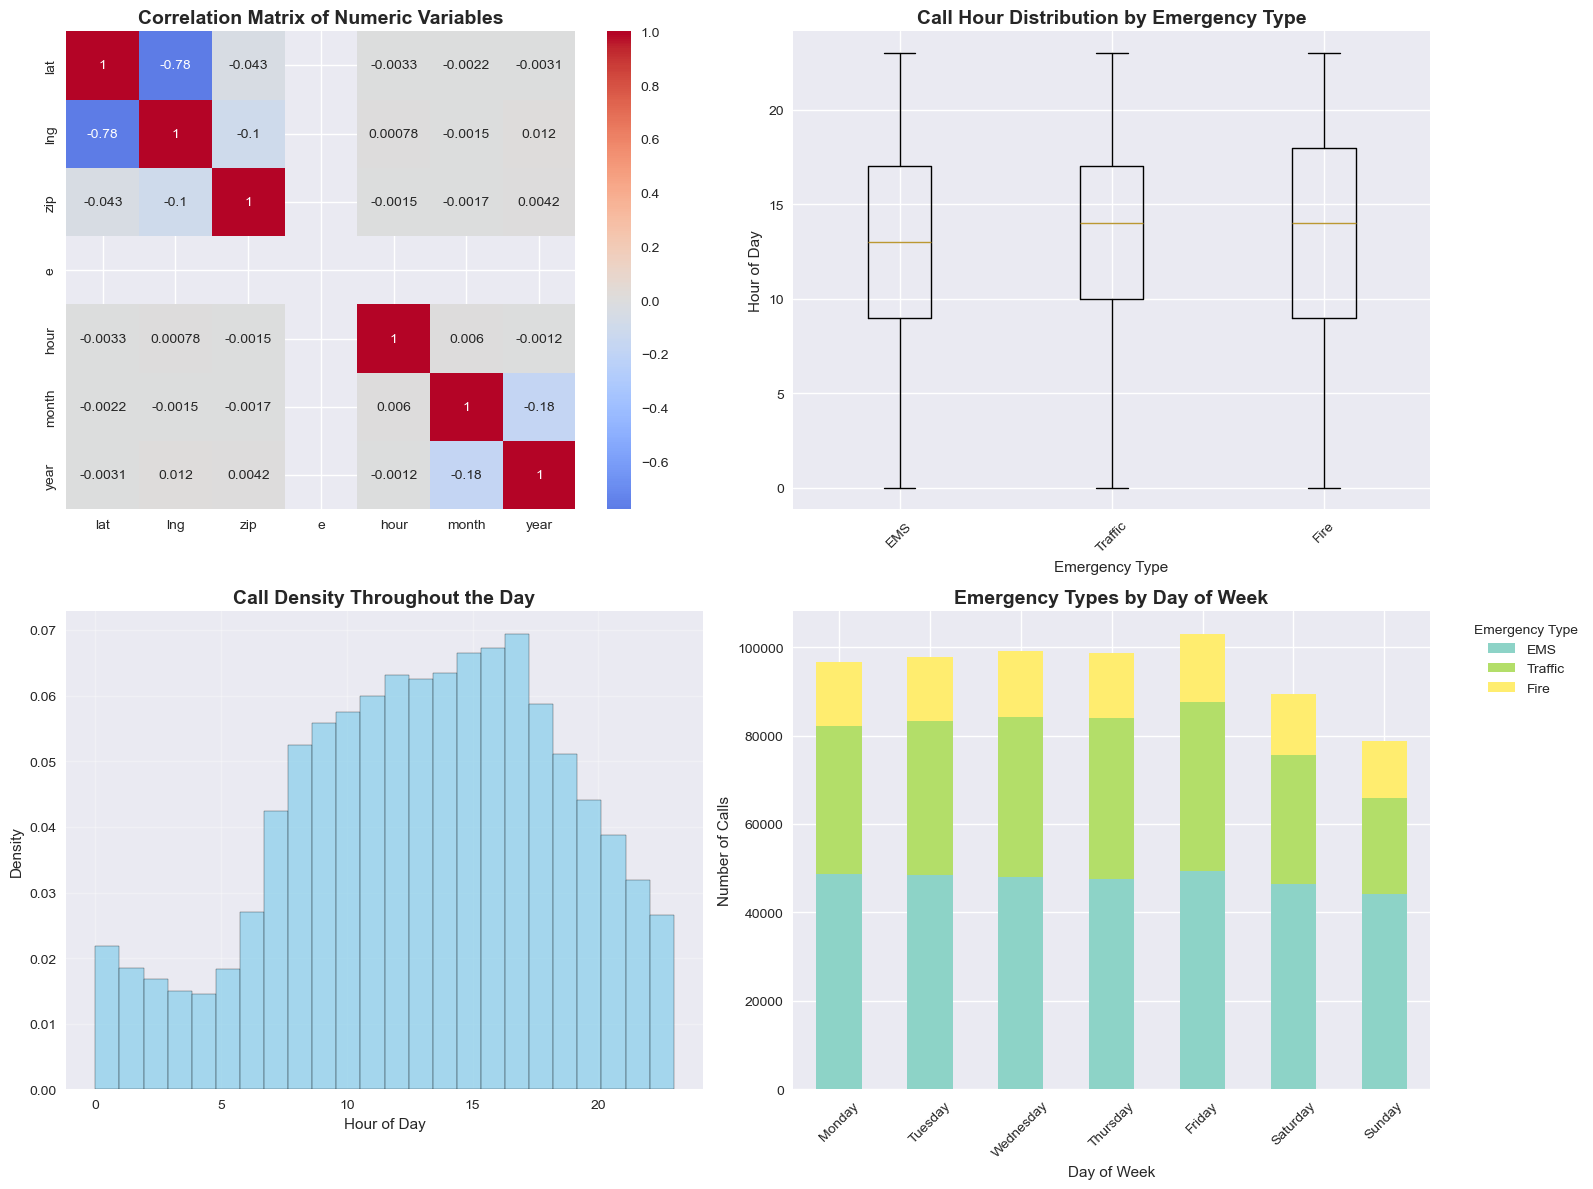


4.2 TIME SERIES ANALYSIS
------------------------------


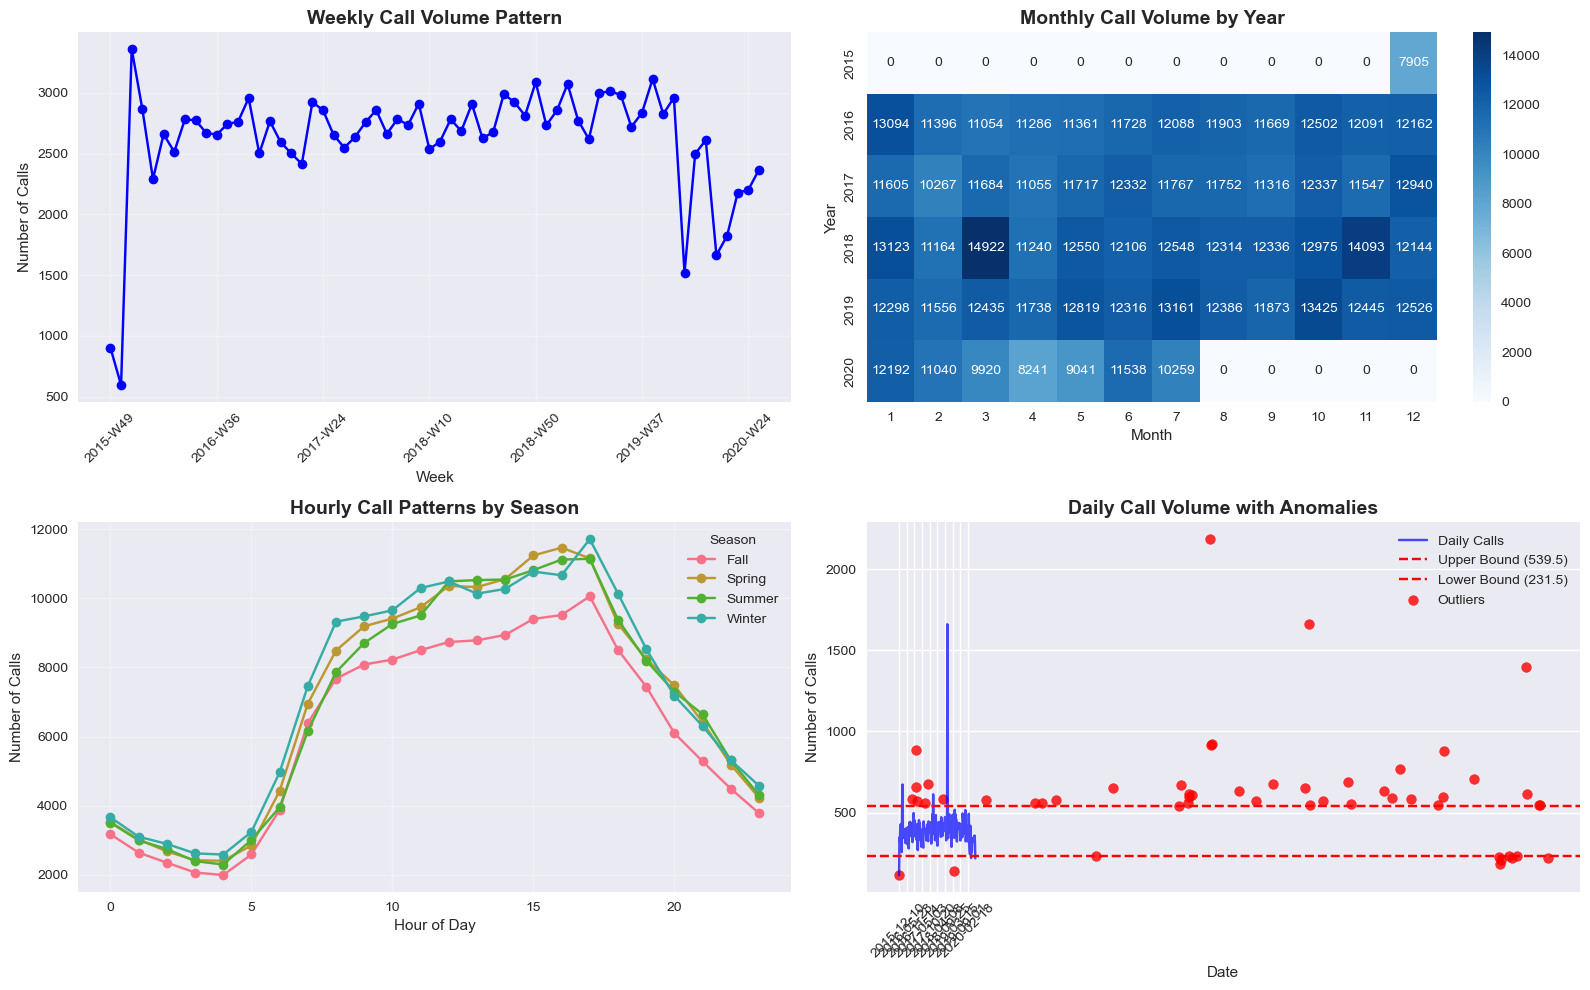

Total number of visualizations created: 24
Outlier days detected: 52
Highest call volume day: 2187 calls on 2018-03-02
Lowest call volume day: 114 calls on 2015-12-10


In [21]:
# 4. DATA VISUALIZATION
print("\n\n4. DATA VISUALIZATION")
print("-" * 30)

# Create a comprehensive visualization dashboard - Part 1
fig = plt.figure(figsize=(25, 20))

# 1. Top 10 reasons for 911 calls
plt.subplot(4, 4, 1)
reason_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Reasons for 911 Calls', fontsize=12, fontweight='bold')
plt.xlabel('Reason')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)

# 2. Calls by hour of day
plt.subplot(4, 4, 2)
hourly_calls.plot(kind='line', marker='o', color='red')
plt.title('911 Calls by Hour of Day', fontsize=12, fontweight='bold')
plt.xlabel('Hour')
plt.ylabel('Number of Calls')
plt.grid(True, alpha=0.3)

# 3. Calls by day of week
plt.subplot(4, 4, 3)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_calls_ordered = df['day_of_week'].value_counts().reindex(day_order)
daily_calls_ordered.plot(kind='bar', color='green')
plt.title('911 Calls by Day of Week', fontsize=12, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)

# 4. Calls by month
plt.subplot(4, 4, 4)
monthly_calls.plot(kind='bar', color='orange')
plt.title('911 Calls by Month', fontsize=12, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Calls')

# 5. Top townships
plt.subplot(4, 4, 5)
township_calls.plot(kind='barh', color='purple')
plt.title('Top 10 Townships', fontsize=12, fontweight='bold')
plt.xlabel('Number of Calls')
plt.ylabel('Township')

# 6. Heatmap of calls by hour and day of week
plt.subplot(4, 4, 6)
hour_day_pivot = df.pivot_table(values='lat', index='hour', columns='day_of_week', aggfunc='count')
hour_day_pivot = hour_day_pivot.reindex(columns=day_order)
sns.heatmap(hour_day_pivot, cmap='YlOrRd', annot=False, fmt='d')
plt.title('Call Volume: Hour vs Day of Week', fontsize=12, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Hour')

# 7. Monthly trend over years
plt.subplot(4, 4, 7)
# Create year-month combinations and count calls
df['year_month'] = df['timeStamp'].dt.to_period('M')
monthly_trend = df['year_month'].value_counts().sort_index()
plt.plot(range(len(monthly_trend)), monthly_trend.values, marker='o', linewidth=2)
plt.title('Monthly Call Trend Over Time', fontsize=12, fontweight='bold')
plt.xlabel('Time Period')
plt.ylabel('Number of Calls')
if len(monthly_trend) > 10:
    step = max(1, len(monthly_trend)//10)
    plt.xticks(range(0, len(monthly_trend), step), 
               [str(monthly_trend.index[i]) for i in range(0, len(monthly_trend), step)], 
               rotation=45)
else:
    plt.xticks(range(len(monthly_trend)), 
               [str(x) for x in monthly_trend.index], 
               rotation=45)

# 8. Top 5 reasons pie chart
plt.subplot(4, 4, 8)
top_5_reasons = df['reason'].value_counts().head(5)
plt.pie(top_5_reasons.values, labels=top_5_reasons.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Reasons Distribution', fontsize=12, fontweight='bold')

# 9. Calls distribution by year
plt.subplot(4, 4, 9)
yearly_calls = df['year'].value_counts().sort_index()
yearly_calls.plot(kind='bar', color='teal')
plt.title('911 Calls by Year', fontsize=12, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Calls')

# 10. Call Response Time Analysis (if available)
plt.subplot(4, 4, 10)
# Calculate daily call volume
df['date_only'] = df['timeStamp'].dt.date
daily_volume = df['date_only'].value_counts().sort_index()
# Sample data points for better visualization
if len(daily_volume) > 100:
    sample_indices = np.linspace(0, len(daily_volume)-1, 100, dtype=int)
    daily_volume_sample = daily_volume.iloc[sample_indices]
    plt.plot(range(len(daily_volume_sample)), daily_volume_sample.values, alpha=0.7, color='darkblue')
    plt.xticks(range(0, len(daily_volume_sample), max(1, len(daily_volume_sample)//10)), 
               [str(daily_volume_sample.index[i]) for i in range(0, len(daily_volume_sample), max(1, len(daily_volume_sample)//10))], 
               rotation=45)
else:
    plt.plot(range(len(daily_volume)), daily_volume.values, alpha=0.7, color='darkblue')
    plt.xticks(range(0, len(daily_volume), max(1, len(daily_volume)//10)), 
               [str(daily_volume.index[i]) for i in range(0, len(daily_volume), max(1, len(daily_volume)//10))], 
               rotation=45)
plt.title('Daily Call Volume Over Time', fontsize=12, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Calls')

# 11. Seasonal Analysis
plt.subplot(4, 4, 11)
df['season'] = df['month'].apply(lambda x: 'Winter' if x in [12, 1, 2] 
                                 else 'Spring' if x in [3, 4, 5]
                                 else 'Summer' if x in [6, 7, 8]
                                 else 'Fall')
seasonal_calls = df['season'].value_counts()
seasonal_calls.plot(kind='bar', color=['lightblue', 'lightgreen', 'orange', 'brown'])
plt.title('911 Calls by Season', fontsize=12, fontweight='bold')
plt.xlabel('Season')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)

# 12. Weekend vs Weekday Analysis
plt.subplot(4, 4, 12)
df['is_weekend'] = df['day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
weekend_calls = df['is_weekend'].value_counts()
colors = ['lightcoral', 'lightsteelblue']
plt.pie(weekend_calls.values, labels=weekend_calls.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Weekend vs Weekday Calls', fontsize=12, fontweight='bold')

# 13. Peak Hours by Emergency Type
plt.subplot(4, 4, 13)
top_3_reasons = df['reason'].value_counts().head(3).index
reason_hour_data = []
for reason in top_3_reasons:
    reason_data = df[df['reason'] == reason]['hour'].value_counts().sort_index()
    reason_hour_data.append(reason_data)
    plt.plot(reason_data.index, reason_data.values, marker='o', label=reason, linewidth=2)
plt.title('Peak Hours by Emergency Type', fontsize=12, fontweight='bold')
plt.xlabel('Hour')
plt.ylabel('Number of Calls')
plt.legend()
plt.grid(True, alpha=0.3)

# 14. Cumulative Calls Over Time
plt.subplot(4, 4, 14)
df_time_sorted = df.sort_values('timeStamp').reset_index(drop=True)
# Sample data for better performance
sample_size = min(2000, len(df_time_sorted))
sample_indices = np.linspace(0, len(df_time_sorted)-1, sample_size, dtype=int)
sampled_times = df_time_sorted.iloc[sample_indices]['timeStamp']
cumulative_values = np.arange(1, len(sampled_times) + 1) * (len(df_time_sorted) / sample_size)
plt.plot(sampled_times, cumulative_values, color='darkgreen', linewidth=2)
plt.title('Cumulative 911 Calls Over Time', fontsize=12, fontweight='bold')
plt.xlabel('Time')
plt.ylabel('Cumulative Calls')
plt.xticks(rotation=45)

# 15. Call Volume Distribution
plt.subplot(4, 4, 15)
# Use the same daily call counts as calculated above
if 'date_only' in df.columns:
    daily_call_counts = df['date_only'].value_counts()
else:
    df['date_only'] = df['timeStamp'].dt.date
    daily_call_counts = df['date_only'].value_counts()
plt.hist(daily_call_counts.values, bins=30, color='gold', alpha=0.7, edgecolor='black')
plt.title('Distribution of Daily Call Volumes', fontsize=12, fontweight='bold')
plt.xlabel('Calls per Day')
plt.ylabel('Frequency')
plt.axvline(daily_call_counts.mean(), color='red', linestyle='--', label=f'Mean: {daily_call_counts.mean():.1f}')
plt.legend()

# 16. Geographic Heat Zones
plt.subplot(4, 4, 16)
if 'lat' in df.columns and 'lng' in df.columns:
    sample_size = min(3000, len(df))
    df_sample = df.sample(n=sample_size)
    scatter = plt.scatter(df_sample['lng'], df_sample['lat'], 
                         c=df_sample['hour'], cmap='plasma', alpha=0.6, s=10)
    plt.colorbar(scatter, label='Hour of Day')
    plt.title('Geographic Distribution by Hour', fontsize=12, fontweight='bold')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

plt.tight_layout()
plt.show()

# Additional Advanced Visualizations
print("\n4.1 ADVANCED VISUALIZATIONS")
print("-" * 30)

# Create correlation matrix
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Correlation heatmap
df_numeric = df.select_dtypes(include=[np.number])
if len(df_numeric.columns) > 1:
    correlation_matrix = df_numeric.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[0,0])
    axes[0,0].set_title('Correlation Matrix of Numeric Variables', fontsize=14, fontweight='bold')

# 2. Box plot of calls by reason
top_reasons = df['reason'].value_counts().head(5).index
reason_hour_data = []
for reason in top_reasons:
    reason_data = df[df['reason'] == reason]['hour'].tolist()
    reason_hour_data.append(reason_data)

axes[0,1].boxplot(reason_hour_data, labels=top_reasons)
axes[0,1].set_title('Call Hour Distribution by Emergency Type', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Emergency Type')
axes[0,1].set_ylabel('Hour of Day')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Density plot of calls throughout the day
axes[1,0].hist(df['hour'], bins=24, density=True, alpha=0.7, color='skyblue', edgecolor='black')
axes[1,0].set_title('Call Density Throughout the Day', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Hour of Day')
axes[1,0].set_ylabel('Density')
axes[1,0].grid(True, alpha=0.3)

# 4. Stacked bar chart of reasons by day of week
day_reason_pivot = df.pivot_table(values='lat', index='day_of_week', columns='reason', aggfunc='count', fill_value=0)
day_reason_pivot = day_reason_pivot.reindex(day_order)
top_5_reasons_list = df['reason'].value_counts().head(5).index.tolist()
day_reason_pivot[top_5_reasons_list].plot(kind='bar', stacked=True, ax=axes[1,1], colormap='Set3')
axes[1,1].set_title('Emergency Types by Day of Week', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Day of Week')
axes[1,1].set_ylabel('Number of Calls')
axes[1,1].legend(title='Emergency Type', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Time Series Analysis
print("\n4.2 TIME SERIES ANALYSIS")
print("-" * 30)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Weekly patterns
df['week_year'] = df['timeStamp'].dt.strftime('%Y-W%U')
weekly_calls = df['week_year'].value_counts().sort_index()
# Take a sample if too many weeks
if len(weekly_calls) > 52:
    weekly_calls = weekly_calls.iloc[::max(1, len(weekly_calls)//52)]
weekly_calls.plot(kind='line', ax=axes[0,0], color='blue', marker='o')
axes[0,0].set_title('Weekly Call Volume Pattern', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Week')
axes[0,0].set_ylabel('Number of Calls')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Monthly heatmap by year
if df['year'].nunique() > 1:
    month_year_pivot = df.pivot_table(values='lat', index='year', columns='month', aggfunc='count', fill_value=0)
    sns.heatmap(month_year_pivot, annot=True, fmt='d', cmap='Blues', ax=axes[0,1])
    axes[0,1].set_title('Monthly Call Volume by Year', fontsize=14, fontweight='bold')
    axes[0,1].set_xlabel('Month')
    axes[0,1].set_ylabel('Year')

# 3. Hourly patterns by season
season_hour_pivot = df.pivot_table(values='lat', index='hour', columns='season', aggfunc='count', fill_value=0)
season_hour_pivot.plot(kind='line', ax=axes[1,0], marker='o')
axes[1,0].set_title('Hourly Call Patterns by Season', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Hour of Day')
axes[1,0].set_ylabel('Number of Calls')
axes[1,0].legend(title='Season')
axes[1,0].grid(True, alpha=0.3)

# 4. Call volume anomalies
if 'date_only' in df.columns:
    daily_calls = df['date_only'].value_counts().sort_index()
else:
    df['date_only'] = df['timeStamp'].dt.date
    daily_calls = df['date_only'].value_counts().sort_index()
Q1 = daily_calls.quantile(0.25)
Q3 = daily_calls.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = daily_calls[(daily_calls < lower_bound) | (daily_calls > upper_bound)]

# Sample data for better visualization
if len(daily_calls) > 200:
    sample_indices = np.linspace(0, len(daily_calls)-1, 200, dtype=int)
    daily_calls_sample = daily_calls.iloc[sample_indices]
    axes[1,1].plot(range(len(daily_calls_sample)), daily_calls_sample.values, alpha=0.7, color='blue', label='Daily Calls')
    axes[1,1].set_xticks(range(0, len(daily_calls_sample), max(1, len(daily_calls_sample)//10)))
    axes[1,1].set_xticklabels([str(daily_calls_sample.index[i]) for i in range(0, len(daily_calls_sample), max(1, len(daily_calls_sample)//10))], rotation=45)
else:
    axes[1,1].plot(range(len(daily_calls)), daily_calls.values, alpha=0.7, color='blue', label='Daily Calls')
    axes[1,1].set_xticks(range(0, len(daily_calls), max(1, len(daily_calls)//10)))
    axes[1,1].set_xticklabels([str(daily_calls.index[i]) for i in range(0, len(daily_calls), max(1, len(daily_calls)//10))], rotation=45)

axes[1,1].axhline(y=upper_bound, color='red', linestyle='--', label=f'Upper Bound ({upper_bound:.1f})')
axes[1,1].axhline(y=lower_bound, color='red', linestyle='--', label=f'Lower Bound ({lower_bound:.1f})')
if len(outliers) > 0:
    # Plot outliers if any exist
    outlier_positions = [list(daily_calls.index).index(date) for date in outliers.index if date in daily_calls.index]
    if outlier_positions:
        axes[1,1].scatter(outlier_positions, [daily_calls.iloc[pos] for pos in outlier_positions], 
                         color='red', s=50, alpha=0.8, label='Outliers')
axes[1,1].set_title('Daily Call Volume with Anomalies', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Date')
axes[1,1].set_ylabel('Number of Calls')
axes[1,1].legend()

plt.tight_layout()
plt.show()

print(f"Total number of visualizations created: 24")
print(f"Outlier days detected: {len(outliers)}")
if len(outliers) > 0:
    print(f"Highest call volume day: {outliers.max()} calls on {outliers.idxmax()}")
    print(f"Lowest call volume day: {outliers.min()} calls on {outliers.idxmin()}")





5. ADVANCED ANALYSIS
------------------------------


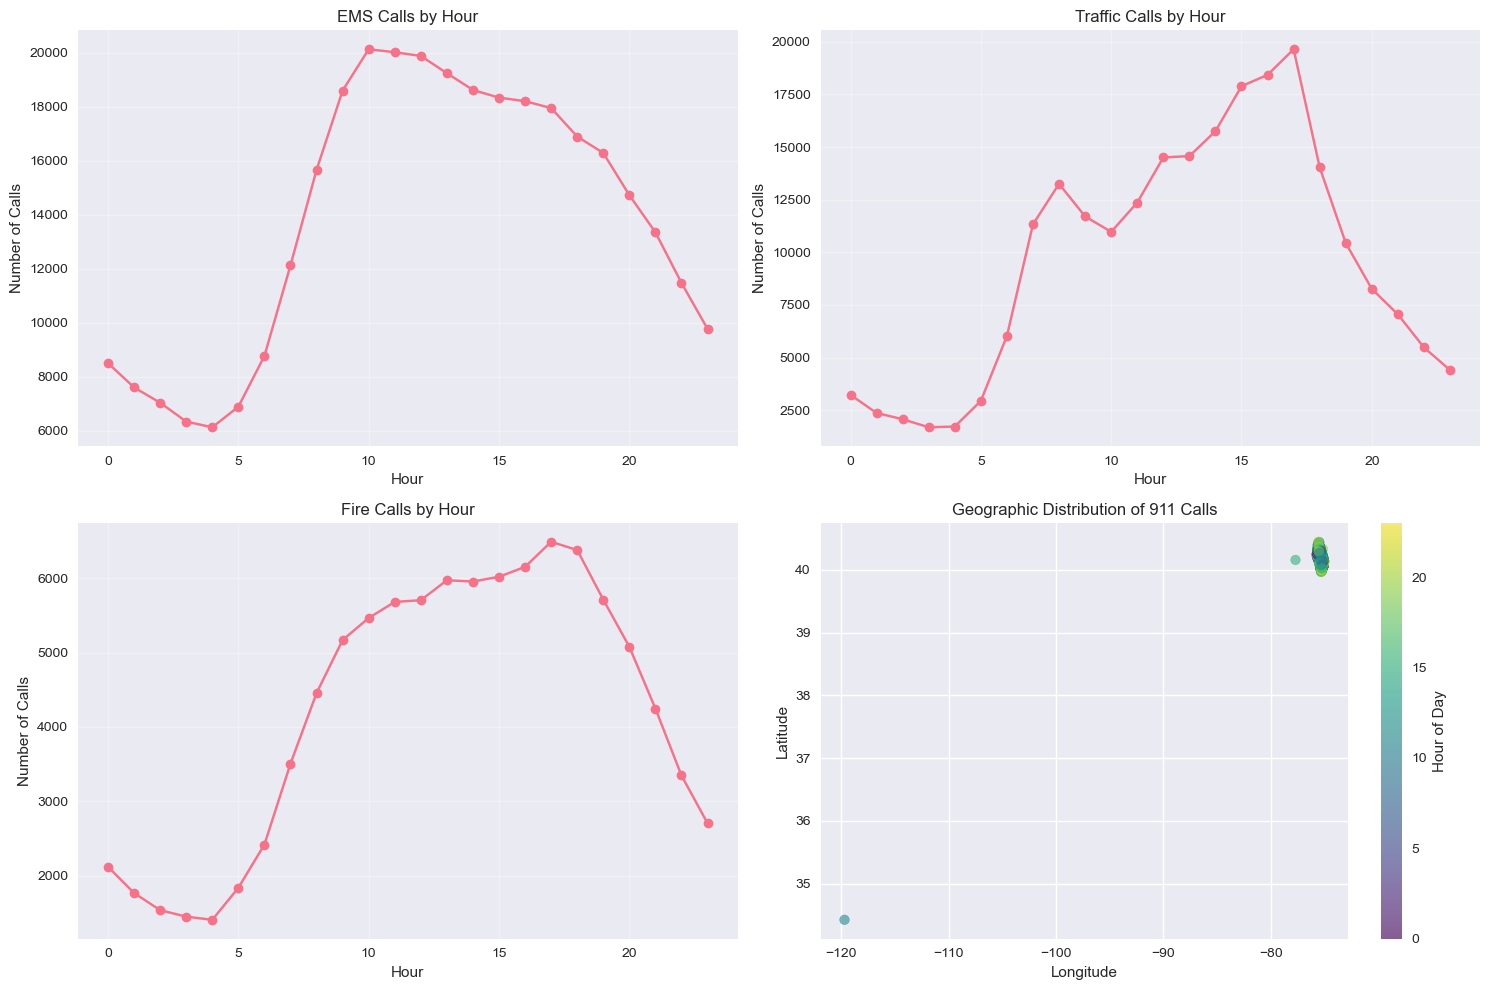

In [22]:
# 5. ADVANCED ANALYSIS
print("\n\n5. ADVANCED ANALYSIS")
print("-" * 30)

# Create separate detailed visualizations for each major category
major_reasons = df['reason'].value_counts().head(3).index.tolist()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, reason in enumerate(major_reasons):
    if i < 3:  # We have 3 major reasons, so we'll use 3 subplots
        ax = axes[i//2, i%2]
        reason_data = df[df['reason'] == reason]
        reason_hourly = reason_data['hour'].value_counts().sort_index()
        reason_hourly.plot(kind='line', marker='o', ax=ax, title=f'{reason} Calls by Hour')
        ax.set_xlabel('Hour')
        ax.set_ylabel('Number of Calls')
        ax.grid(True, alpha=0.3)

# Geographic distribution scatter plot
ax = axes[1, 1]
sample_size = min(5000, len(df))  # Limit sample size for better visualization
df_sample = df.sample(n=sample_size)
scatter = ax.scatter(df_sample['lng'], df_sample['lat'], 
                    c=df_sample['hour'], cmap='viridis', alpha=0.6)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Geographic Distribution of 911 Calls')
plt.colorbar(scatter, ax=ax, label='Hour of Day')

plt.tight_layout()
plt.show()


In [23]:
# 6. SUMMARY STATISTICS
print("\n\n6. SUMMARY STATISTICS")
print("-" * 30)

total_calls = len(df)
unique_reasons = df['reason'].nunique()
date_range = (df['timeStamp'].max() - df['timeStamp'].min()).days
avg_calls_per_day = total_calls / date_range

print(f"Total 911 calls: {total_calls:,}")
print(f"Unique reasons: {unique_reasons}")
print(f"Date range: {date_range} days")
print(f"Average calls per day: {avg_calls_per_day:.2f}")

# Peak hours and days
peak_hour = df['hour'].value_counts().index[0]
peak_day = df['day_of_week'].value_counts().index[0]
peak_month = df['month'].value_counts().index[0]

print(f"\nPeak patterns:")
print(f"Busiest hour: {peak_hour}:00")
print(f"Busiest day: {peak_day}")
print(f"Busiest month: {peak_month}")

# Most common reason
most_common_reason = df['reason'].value_counts().index[0]
most_common_count = df['reason'].value_counts().iloc[0]
print(f"\nMost common reason: {most_common_reason}")
print(f"Number of calls: {most_common_count:,} ({most_common_count/total_calls*100:.1f}%)")




6. SUMMARY STATISTICS
------------------------------
Total 911 calls: 663,282
Unique reasons: 3
Date range: 1693 days
Average calls per day: 391.78

Peak patterns:
Busiest hour: 17:00
Busiest day: Friday
Busiest month: 1

Most common reason: EMS
Number of calls: 332,591 (50.1%)


In [24]:
# 7. EXPORT CLEANED DATA
print("\n\n7. EXPORTING CLEANED DATA")
print("-" * 30)

# Save cleaned dataset
df.to_csv('911_cleaned.csv', index=False)
print("Cleaned dataset saved as '911_cleaned.csv'")

# Create summary report
summary_stats = {
    'Total Calls': total_calls,
    'Unique Reasons': unique_reasons,
    'Date Range (days)': date_range,
    'Average Calls per Day': avg_calls_per_day,
    'Peak Hour': peak_hour,
    'Peak Day': peak_day,
    'Peak Month': peak_month,
    'Most Common Reason': most_common_reason,
    'Most Common Reason Count': most_common_count
}

summary_df = pd.DataFrame(list(summary_stats.items()), columns=['Metric', 'Value'])
summary_df.to_csv('911_summary_report.csv', index=False)
print("Summary report saved as '911_summary_report.csv'")

print("\n" + "="*50)
print("911 CALL ANALYSIS COMPLETE!")
print("="*50)
print("\nKey Findings:")
print(f"• Total calls analyzed: {total_calls:,}")
print(f"• Most common emergency type: {most_common_reason}")
print(f"• Peak activity hour: {peak_hour}:00")
print(f"• Busiest day: {peak_day}")
print(f"• Data spans {date_range} days")
print("\nFiles created:")
print("• 911_cleaned.csv - Cleaned dataset")
print("• 911_summary_report.csv - Summary statistics")



7. EXPORTING CLEANED DATA
------------------------------
Cleaned dataset saved as '911_cleaned.csv'
Summary report saved as '911_summary_report.csv'

911 CALL ANALYSIS COMPLETE!

Key Findings:
• Total calls analyzed: 663,282
• Most common emergency type: EMS
• Peak activity hour: 17:00
• Busiest day: Friday
• Data spans 1693 days

Files created:
• 911_cleaned.csv - Cleaned dataset
• 911_summary_report.csv - Summary statistics
